In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
# from sklearn.pipeline import make_pipeline

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


## Домашнее задание <a class='anchor' id='hw'>

1. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

2. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

3. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

$$Q(w, X) + \lambda |w| \rightarrow \underset{w}{\text{min}}.$$

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

## задание 1
я просто изменил l2 в l1 подставив w / |w|, тк это его производная. и получается +- штраф, который мы поставим руками в reg

In [3]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W / np.abs(W) # градиент регуляризации
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [4]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [5]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [6]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [7]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [8]:
gradient_descent_reg_l1(X_st, y, iterations=1000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [12.00938951  1.69348396  2.31731155  2.94337213], error 3229.6056902451824
Iter: 100, weights: [56.49994999  6.19724339  0.13335956  6.17138024], error 24.948361271973933
Iter: 200, weights: [56.49995     6.29004529 -0.2938225   6.51990079], error 24.905336102263227
Iter: 300, weights: [56.49995     6.30125956 -0.34791645  6.56454072], error 24.904631955564398
Iter: 400, weights: [56.49995     6.30268382 -0.35479218  6.57021588], error 24.904619332632702
Iter: 500, weights: [56.49995     6.30286486 -0.35566618  6.57093728], error 24.904618970375992
Iter: 600, weights: [56.49995     6.30288787 -0.35577728  6.57102898], error 24.90461894440111
Iter: 700, weights: [56.49995     6.3028908  -0.3557914   6.57104064], error 24.90461894142367
Iter: 800, weights: [56.49995     6.30289117 -0.3557932   6.57104212], error 24.904618941050437
Iter: 900, weights: [56.49995     6.30289121 -0.35579342  6.57104231], error 24.90461894100305
Final MSE: 24.90461894099704


array([56.49995   ,  6.30289122, -0.35579345,  6.57104233])

## задание 2
получается, что можно применить и то и другое, но это будет конвертирование стандартизации в нормализацию или наоборот

In [9]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [10]:
X_norm = X_st.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [11]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [12]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm


array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [13]:
X_st = X_norm.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.00000000e+00, -7.07106781e-01, -9.79589689e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -7.07106781e-01, -5.67130873e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01, -4.64016169e-01,
         3.84110640e-01],
       [ 1.00000000e+00,  7.07106781e-01, -7.73360281e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -1.96261557e-16,  9.79589689e-01,
         3.84110640e-01],
       [ 1.00000000e+00, -1.06066017e+00, -3.60901465e-01,
        -8.96258160e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.08270439e+00,
         1.66447944e+00],
       [ 1.00000000e+00,  2.47487373e+00,  2.11385144e+00,
         1.66447944e+00],
       [ 1.00000000e+00, -7.07106781e-01, -1.08270439e+00,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01,  5.15573521e-02,
         3.84110640e-01]])

## задание 3
сгенерировал данные, взял оба спуска, сравних их mse на графике

In [14]:
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 10
display(X, Y, coef)

array([[  3.78794466,  -0.61837549],
       [ -6.52931145,  -1.06706712],
       [-10.6581629 ,  -0.34682333],
       ...,
       [ 11.94510163,   1.00147133],
       [  1.25623099,   0.35261274],
       [ -0.5674652 ,   0.41214611]])

array([-2.61123036e+01, -1.22254125e+02, -9.33701155e+01,  2.23698676e+01,
       -1.19353069e+00,  7.55093913e+01,  4.17391914e+00,  3.37850492e+01,
       -4.13327830e+01, -1.71060319e+00,  6.91533479e+01, -3.84944494e+01,
       -1.40841311e+01, -7.87094871e+00,  2.24655412e+01,  3.52449558e+01,
        3.54202311e+01,  4.54019343e+01,  3.93612257e+01,  1.13645719e-01,
       -1.23294801e+01,  1.18940297e+02,  2.90747757e+02,  1.07353713e+01,
        1.33621709e+02, -8.58105655e+01, -1.19323461e+01,  5.66776267e+01,
        1.45867826e+02, -2.72626165e+02, -3.86689973e+00,  4.64700598e+01,
        1.34844522e+02,  1.01167107e+01,  1.02407708e+01,  1.50555004e+01,
        6.05940840e+01, -1.46615087e-01, -1.04571676e+02, -1.09697817e+02,
        1.21274981e+01,  9.99648515e+01,  8.47610760e+01, -1.05265489e+02,
        1.35034101e+02, -3.24978496e+02,  6.56243085e+01, -4.80030943e+01,
        8.43343786e+01,  3.38914896e+00,  2.65015621e+01,  6.26227854e+01,
       -1.45046490e+02,  

array([62.6735955, 68.0472182])

In [15]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
display(means, stds)

array([-0.79012702,  0.02045785])

array([9.85635367, 0.99101454])

In [16]:
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]

In [17]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [18]:
%%time

# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 150

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(123)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)
 
    error = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors[-1], 4)}')

Iteration #0: W_new = [2.15256741 7.99525301], MSE = 6942.72
Iteration #100: W_new = [54.86241813 60.79720392], MSE = 126.77
Iter 150: error - 50.89156227787567, weights: [58.52734471 65.62856877]
В случае использования стохастического градиентного спуска ошибка составляет 50.8916
Wall time: 22 ms


In [21]:
%%time

# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_sd = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 150

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(123)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(X, w)
    dQ = 2 / Y.shape[0] * np.dot(X.T, y_pred - Y)
    new_w = w - eta * dQ
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    error = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors_sd.append(error)
    
    
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
# w_pred = w_list[-1]
    


print(f'В случае использования градиентного спуска ошибка составляет {round(errors[-1], 4)}')

В случае использования градиентного спуска ошибка составляет 50.8916
Wall time: 19 ms


Text(0, 0.5, 'MSE')

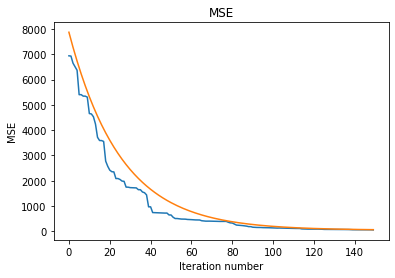

In [20]:
plt.plot(range(len(errors)), errors)
plt.plot(range(len(errors_sd)), errors_sd)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')